In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
#%matplotlib notebook

## Enter the name of HDF5 file and an index (sample) of interest

In [2]:
filename =  "testSet_c7_ver_2.hdf5"
check_idx = 233 # check a specific index (sample sec)

## Visualize the data of selected sample

['images', 'labels', 'signals', 'timeStamps']
Timestamp is: 1612385348
Label is: asphalt


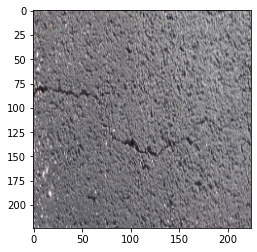

In [3]:
f = h5py.File(filename, 'r')
print(list(f.keys()))
labelp = ['asphalt','grass','gravel','pavement','sand','brick','coated floor']

timeStamp = f['timeStamps']['timeStamps'][check_idx]
signal = f['signals']['signals'][check_idx]
#raw_signal = f['signals']['raw_signals'][check_idx]
image = f['images']['images'][check_idx]
label = f['labels']['labels'][check_idx]

f.close()

print("Timestamp is:",str(timeStamp))
print("Label is:",labelp[label])

Image = image.reshape(224,224,3)/255.0
imgplot = plt.imshow(Image)

## Read the entire HDF5 file (load the entire dataset) (memory warning!!)

In [4]:
f = h5py.File(filename, 'r')
print(list(f.keys()))

timeStamps = f['timeStamps']['timeStamps'][:]
signals = f['signals']['signals'][:]
#raw_signals = f['signals']['raw_signals'][:]
images = f['images']['images'][:]
labels = f['labels']['labels'][:]

print(timeStamps.shape,"# of timeStamps")
print(signals.shape,"# of signals")
#print(raw_signals.shape,"# of raw signals")
print(images.shape,"# of images")
print(labels.shape,"# of labels")

f.close()

['images', 'labels', 'signals', 'timeStamps']
(4020,) # of timeStamps
(4020, 900) # of signals
(4020, 150528) # of images
(4020,) # of labels


## Data reshape

In [5]:
images = images.reshape(images.shape[0],224,224,3)
#raw_signals = raw_signals.reshape(raw_signals.shape[0],100,11)
signals = signals.reshape(signals.shape[0],100,9)

print(timeStamps.shape,"# of timeStamps")
print(signals.shape,"# of signals")
#print(raw_signals.shape,"# of raw signals")
print(images.shape,"# of images")
print(labels.shape,"# of labels")

(4020,) # of timeStamps
(4020, 100, 9) # of signals
(4020, 224, 224, 3) # of images
(4020,) # of labels


In [6]:
print("There are a total of",timeStamps.shape[0],"data entries in this dataset. They are orgainzed by their unique timestamps. One second segment of data is associated with one timestamp #.")
print("There are 9 channels of different signals: joint_states_left, joint_states_right, lin_acc_x, lin_acc_y, lin_acc_z, %slip_left, %slip_right, coeff_of motion_resistance_left, coeff_of motion_resistance_right. As the sampling rate is 100 Hz, there are 100 timesteps in one second segment. The signal data are orgainzed as",signals.shape[0],"timestamps,",signals.shape[1]," timesteps,",signals.shape[2],"channels")
#print("Similarly, there are 11 channels for raw signals: joint_states_left, joint_states_right, lin_acc_x, lin_acc_y, lin_acc_z, T256_lin_x, T256_ang_z, curr_feedabck_left, curr_feedabck_right, imu_roll, imu_pitch. The raw signal data are orgainzed as",raw_signals.shape[0],"timestamps,",raw_signals.shape[1]," timesteps,",raw_signals.shape[2],"channels")
print("The RGB images are resized to",images.shape[1],"x",images.shape[2],"pixels.")
print("Finally, there are",labels.shape[0],"labels. asphalt: 0 | grass: 1 | gravel: 2 | pavement: 3 | sand: 4  | brick: 5  | coated floor: 6 ")

There are a total of 4020 data entries in this dataset. They are orgainzed by their unique timestamps. One second segment of data is associated with one timestamp #.
There are 9 channels of different signals: joint_states_left, joint_states_right, lin_acc_x, lin_acc_y, lin_acc_z, %slip_left, %slip_right, coeff_of motion_resistance_left, coeff_of motion_resistance_right. As the sampling rate is 100 Hz, there are 100 timesteps in one second segment. The signal data are orgainzed as 4020 timestamps, 100  timesteps, 9 channels
The RGB images are resized to 224 x 224 pixels.
Finally, there are 4020 labels. asphalt: 0 | grass: 1 | gravel: 2 | pavement: 3 | sand: 4  | brick: 5  | coated floor: 6 
